In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
nan_feature = [features for features in df.columns if df[features].isnull().sum()>1]

for feature in nan_feature:
  print(feature, np.round(df[feature].isnull().mean(), 2), '% missing values')

LotFrontage 0.18 % missing values
Alley 0.94 % missing values
MasVnrType 0.01 % missing values
MasVnrArea 0.01 % missing values
BsmtQual 0.03 % missing values
BsmtCond 0.03 % missing values
BsmtExposure 0.03 % missing values
BsmtFinType1 0.03 % missing values
BsmtFinType2 0.03 % missing values
FireplaceQu 0.47 % missing values
GarageType 0.06 % missing values
GarageYrBlt 0.06 % missing values
GarageFinish 0.06 % missing values
GarageQual 0.06 % missing values
GarageCond 0.06 % missing values
PoolQC 1.0 % missing values
Fence 0.81 % missing values
MiscFeature 0.96 % missing values


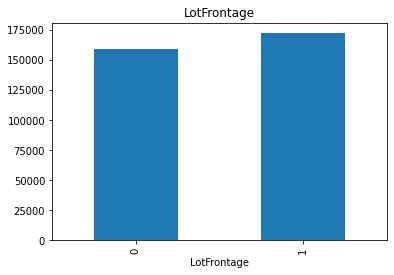

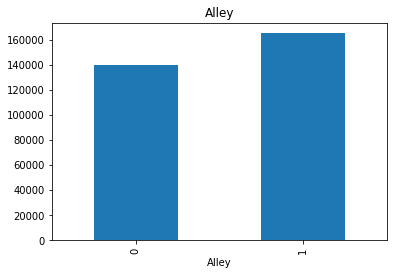

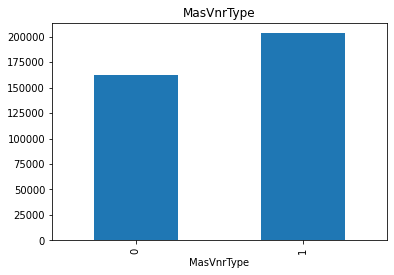

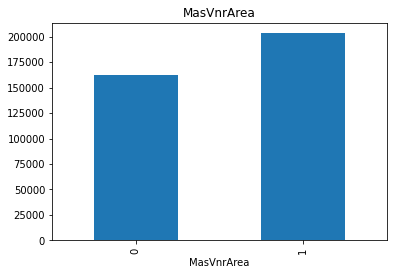

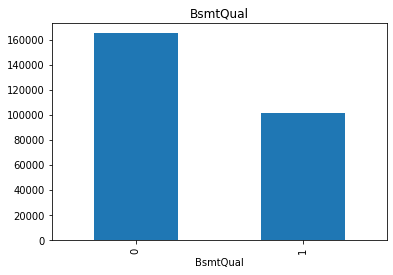

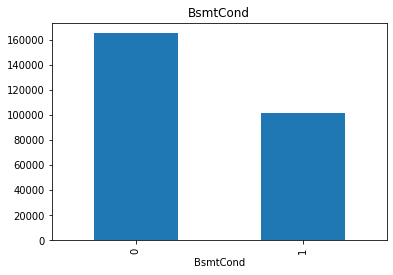

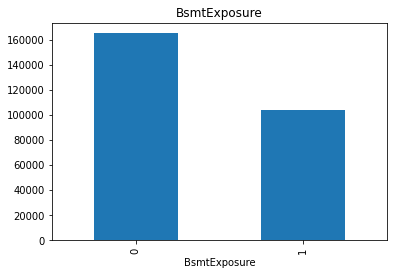

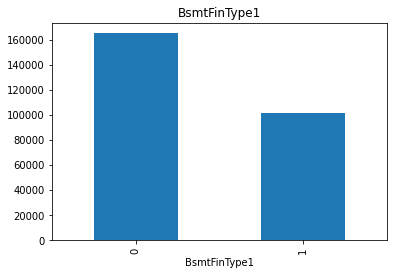

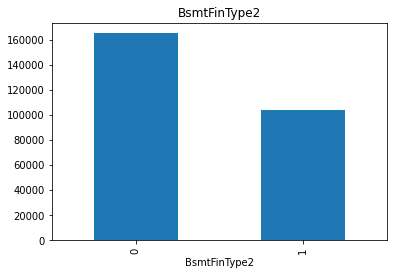

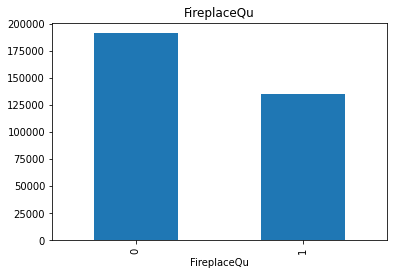

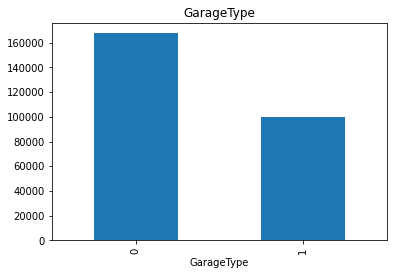

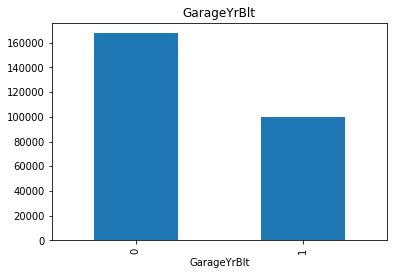

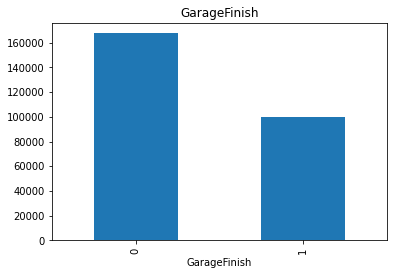

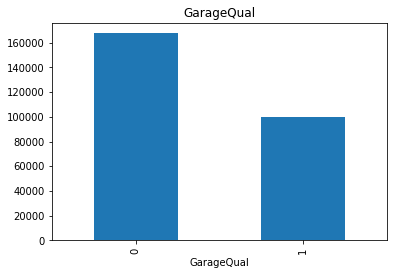

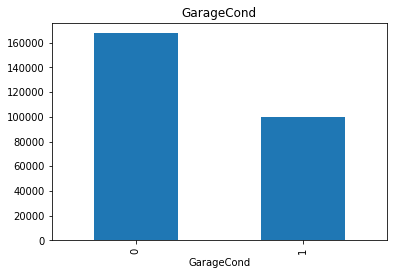

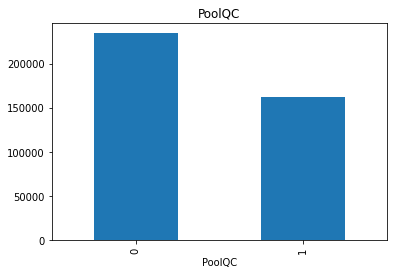

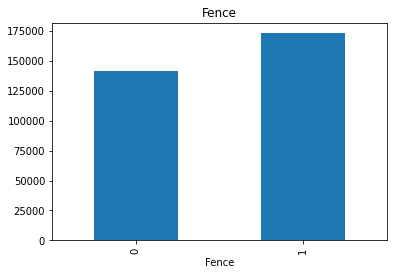

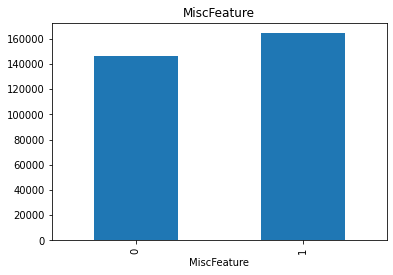

In [ ]:
for feature in nan_feature:
  df1 = df.copy()
  df1[feature] = np.where(df1[feature].isnull(), 1, 0)
  df1.groupby(feature)['SalePrice'].median().plot.bar()
  plt.title(feature)
  plt.show()

In [ ]:
numer_features = [features for features in df.columns if df[features].dtype != 'O']
print('No. of num features: ', len(numer_features))

No. of num features:  38


In [ ]:
year_feature = [features for features in numer_features if 'Yr' in features or 'Year' in features]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
for features in year_feature:
  print(features, df[features].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

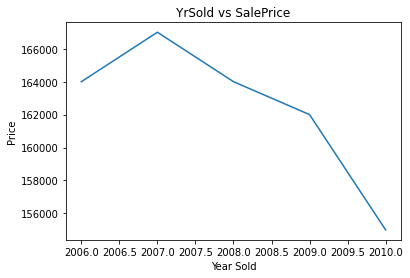

In [ ]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Price')
plt.title('YrSold vs SalePrice')
plt.show()

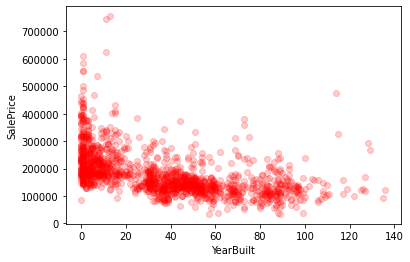

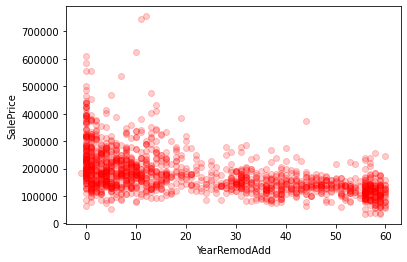

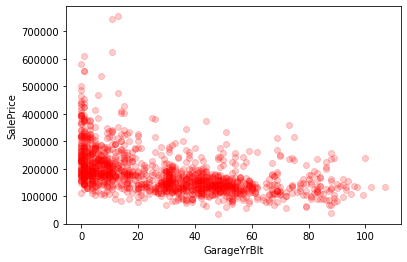

In [ ]:
for features in year_feature:
  if features != 'YrSold':
    df1 = df.copy()
    df1[features] = df1['YrSold'] - df1[features]

    plt.scatter(df1[features], df1['SalePrice'], c = 'r', alpha= 0.2)
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    plt.show()

In [ ]:
discrete_feature = [features for features in numer_features if len(df[features].unique()) <25
                    and features not in year_feature+['Id']]
print('No. of discrete features: ', len(discrete_feature))

No. of discrete features:  17


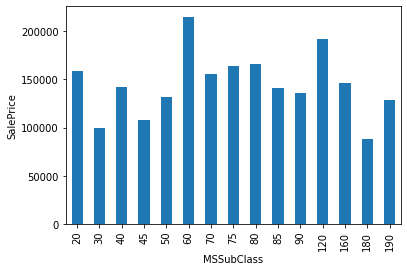

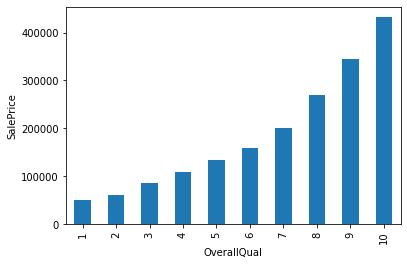

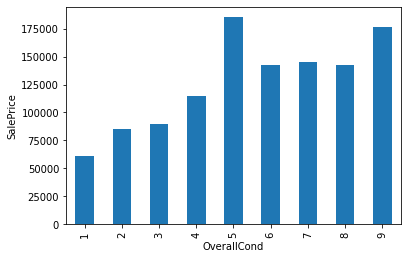

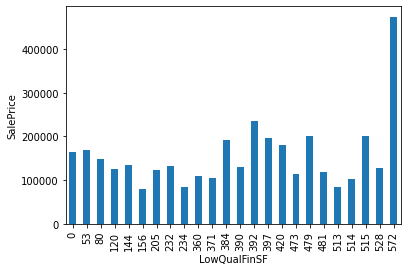

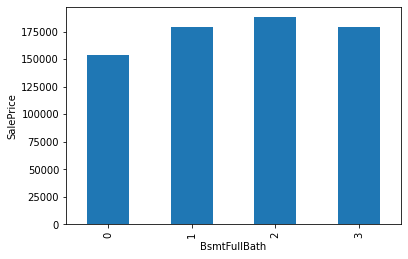

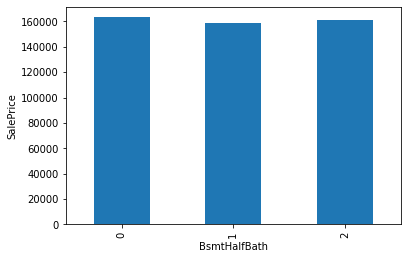

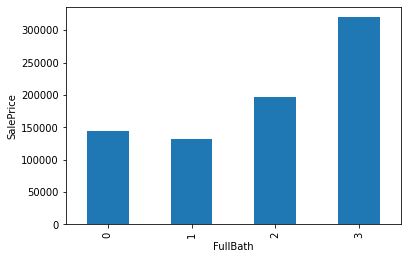

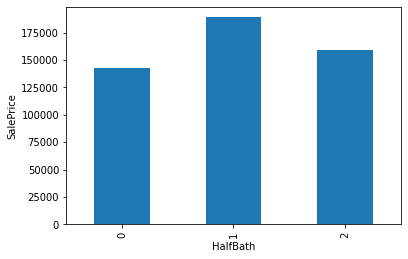

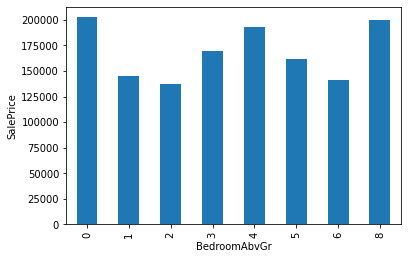

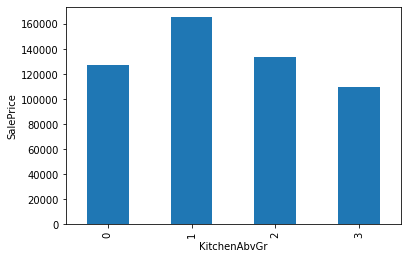

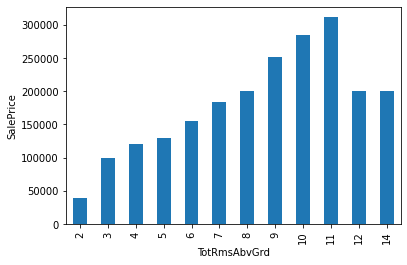

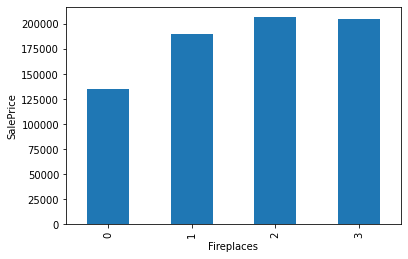

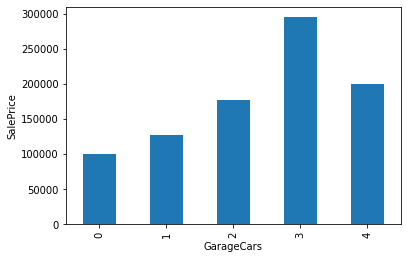

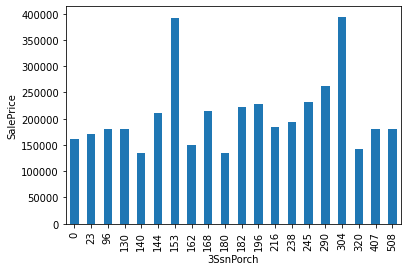

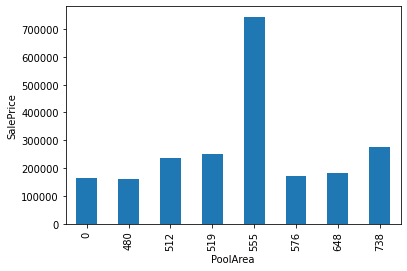

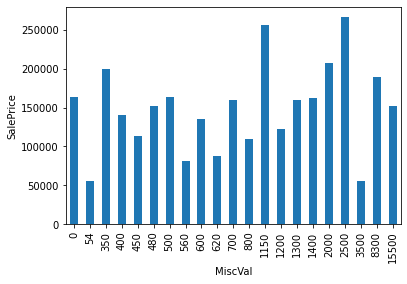

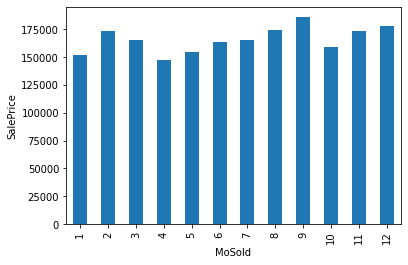

In [ ]:
for features in discrete_feature:
  df1 = df.copy()
  df.groupby(features)['SalePrice'].median().plot.bar()
  plt.xlabel(features)
  plt.ylabel('SalePrice')
  plt.show()

In [ ]:
continuous_features= [features for features in numer_features if features not in discrete_feature+
                     year_feature+['Id']]
print('No. of continuous features: ', len(continuous_features))

No. of continuous features:  16


In [ ]:
df[continuous_features].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


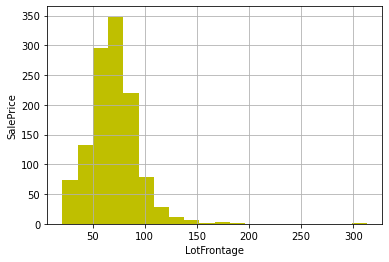

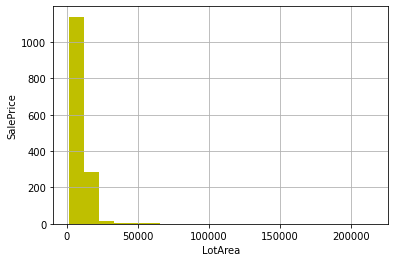

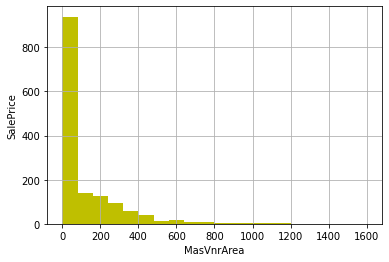

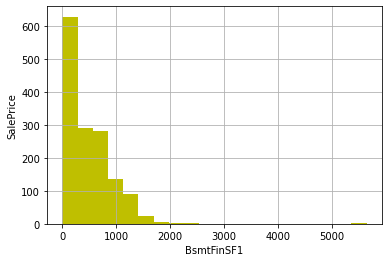

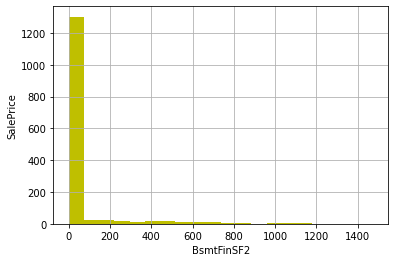

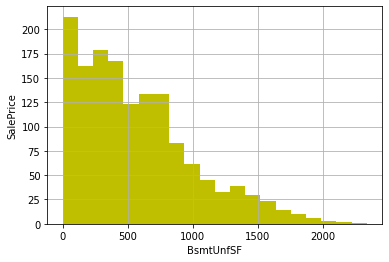

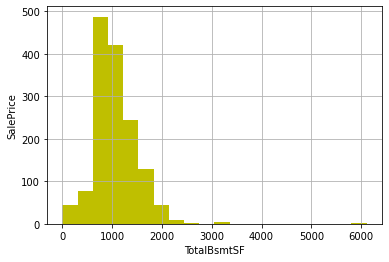

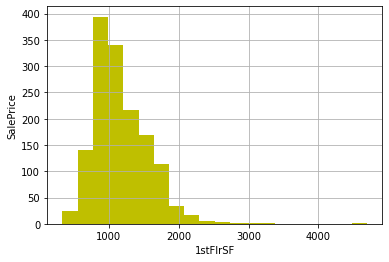

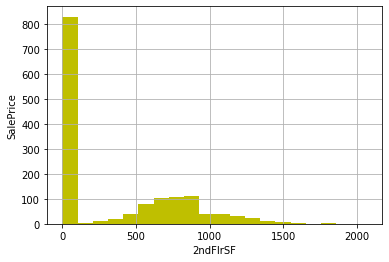

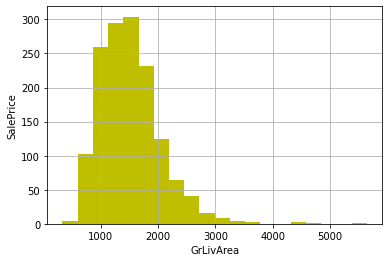

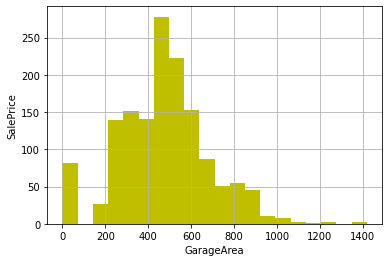

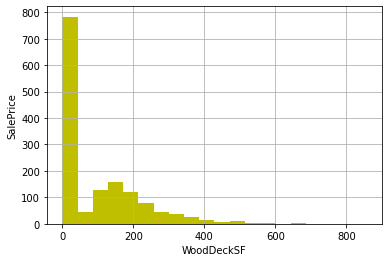

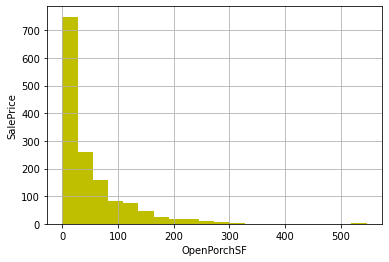

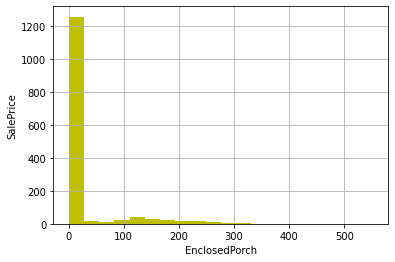

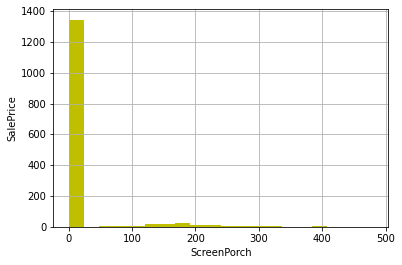

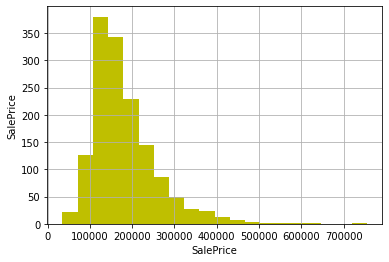

In [ ]:
for features in continuous_features:
  df1 = df.copy()
  df1[features].hist(bins= 20, color= 'y')
  plt.xlabel(features)
  plt.ylabel('SalePrice')
  plt.show()

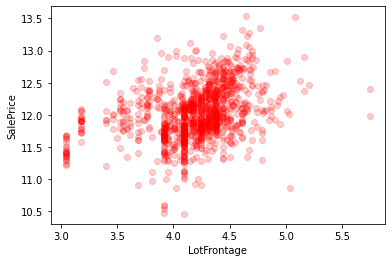

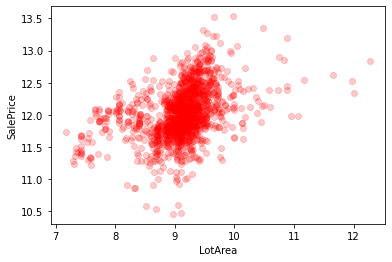

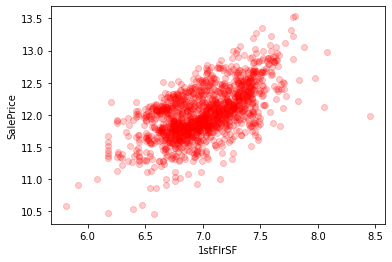

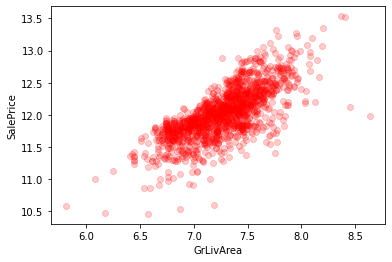

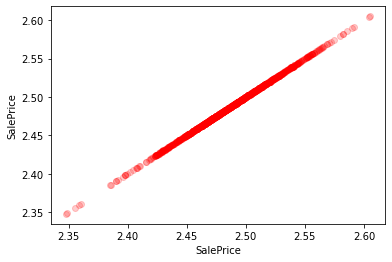

In [ ]:
for features in continuous_features:
  df1 = df.copy()
  if 0 in df1[features].unique():
    pass
  else:
    df1[features]= np.log(df1[features])
    df1['SalePrice']= np.log(df1['SalePrice'])
    plt.scatter(df1[features], df1['SalePrice'], c = 'r', alpha= 0.2)
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    plt.show()


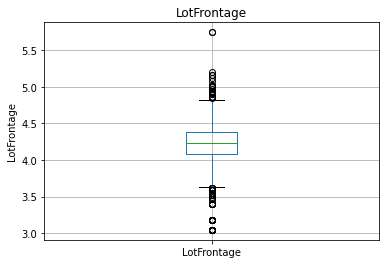

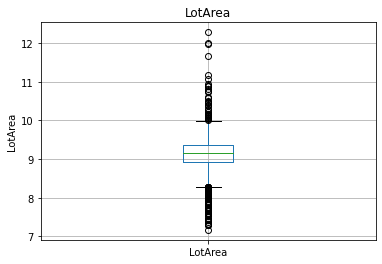

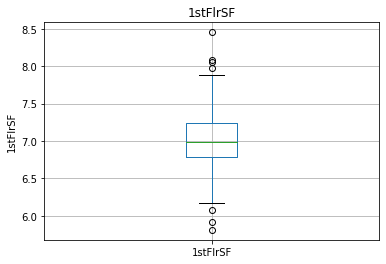

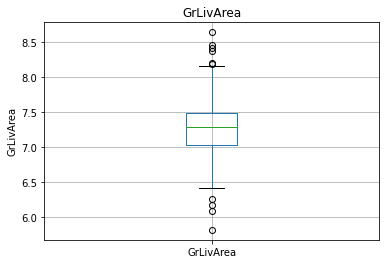

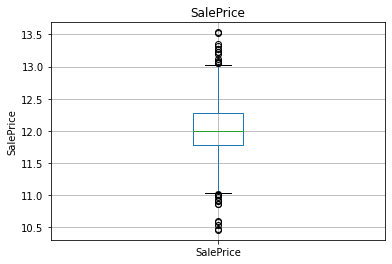

In [ ]:
for features in continuous_features:
  df1= df.copy()
  if 0 in df1[features].unique():
    pass
  else:
    df1[features]= np.log(df1[features])
    df1.boxplot(column= features)
    plt.ylabel(features)
    plt.title(features)
    plt.show()


In [ ]:
categorical_features = [features for features in df.columns if df[features].dtypes == 'O']
print('No. of categorical features: ', len(categorical_features))

No. of categorical features:  43


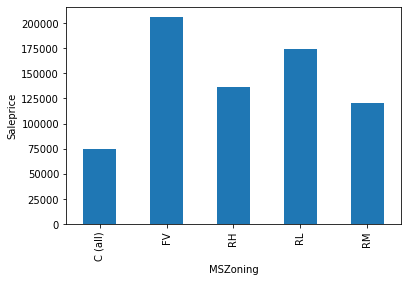

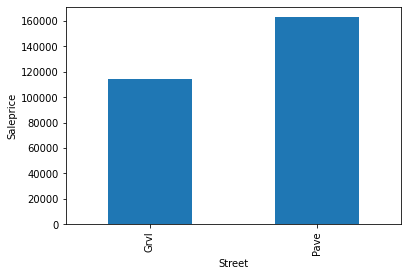

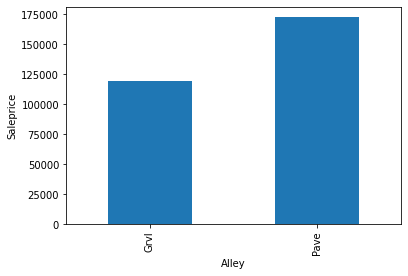

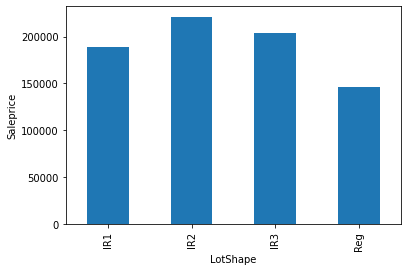

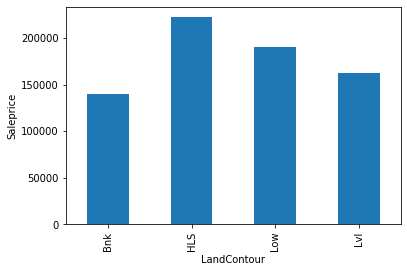

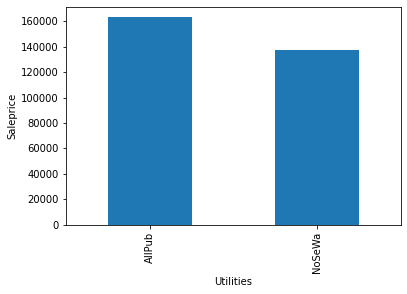

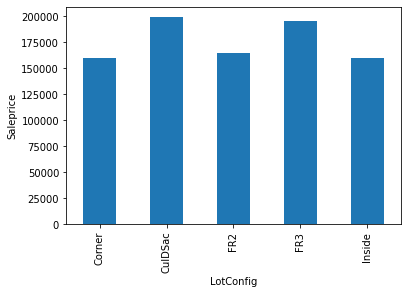

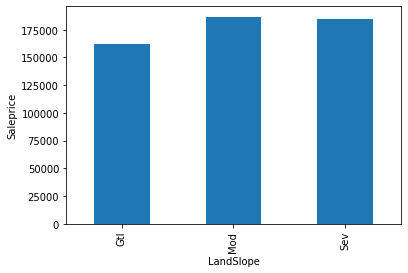

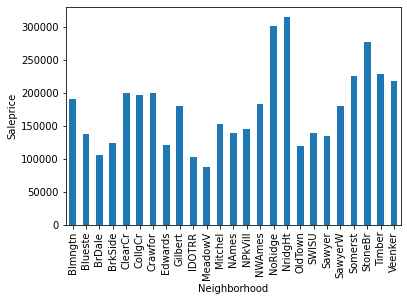

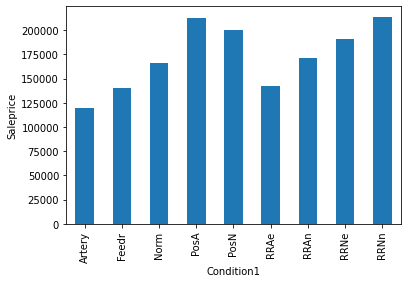

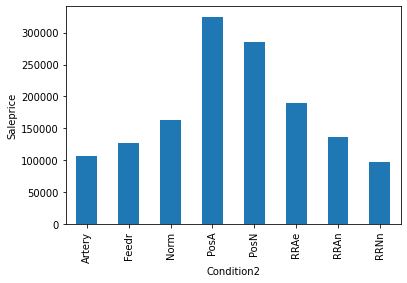

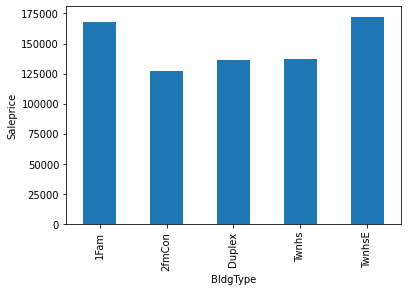

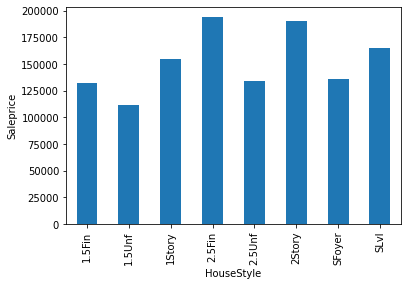

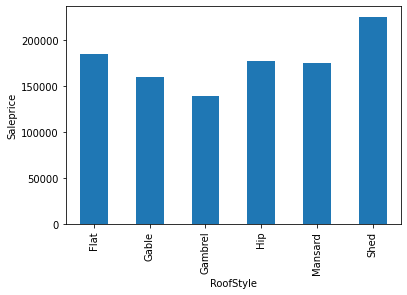

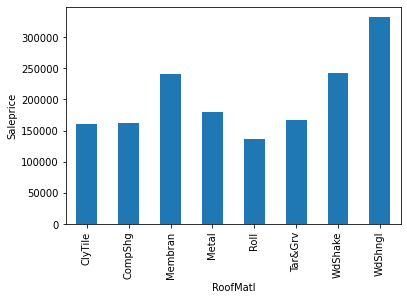

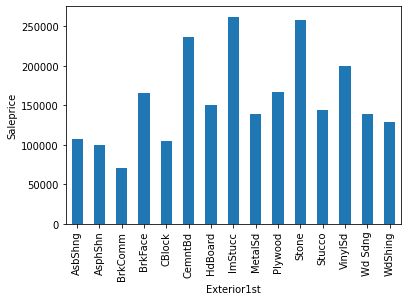

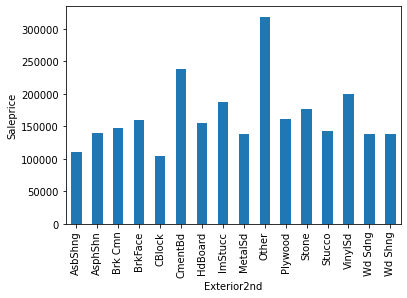

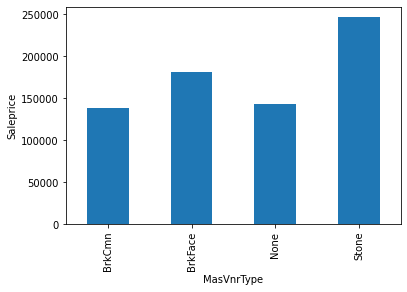

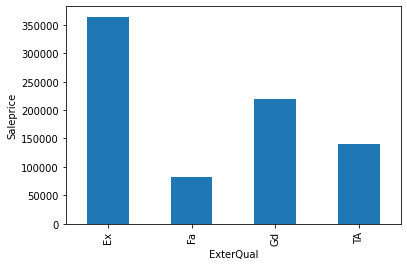

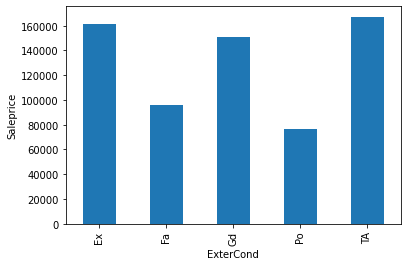

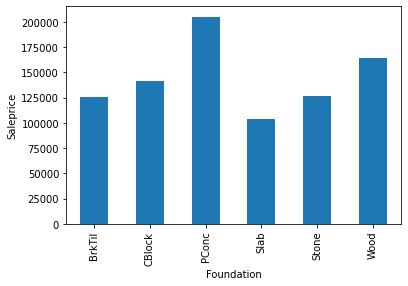

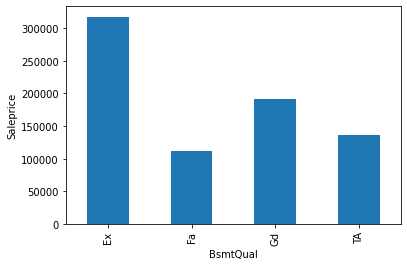

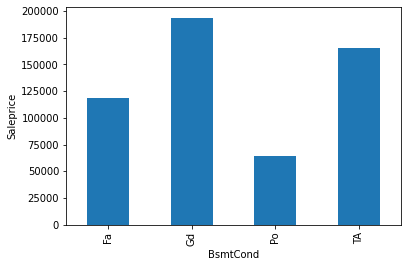

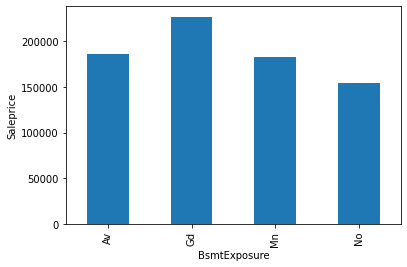

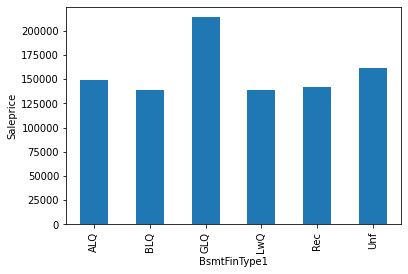

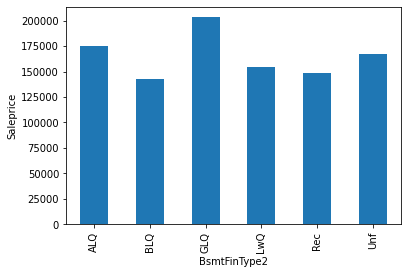

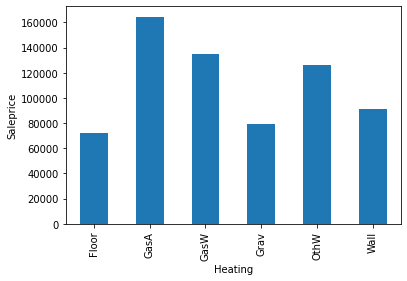

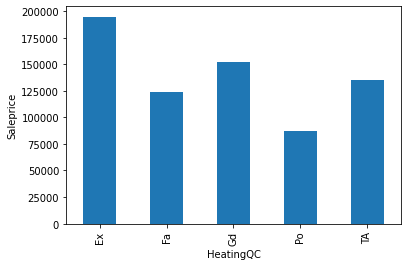

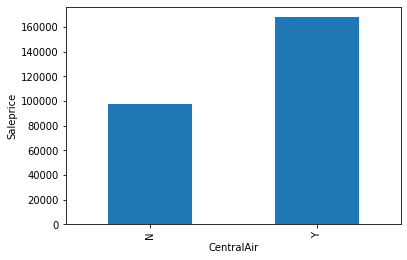

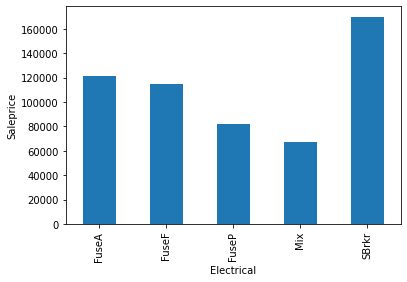

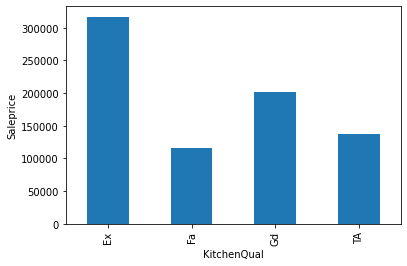

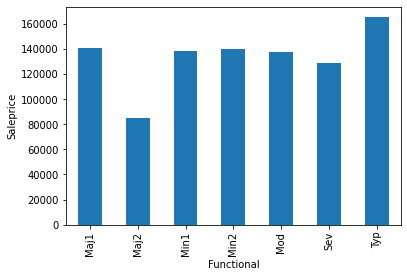

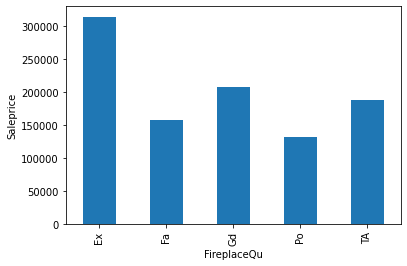

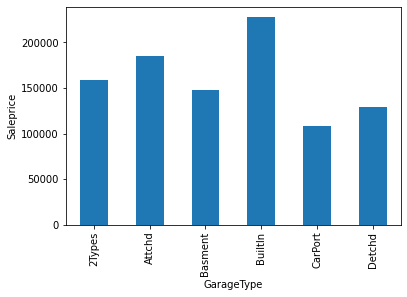

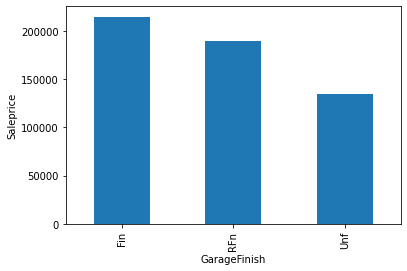

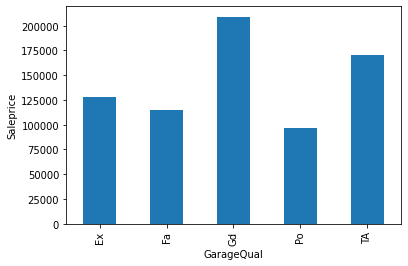

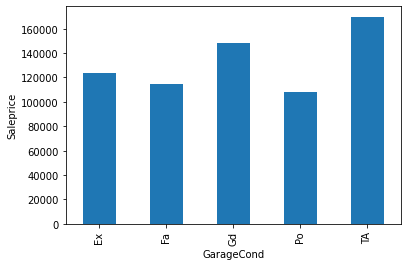

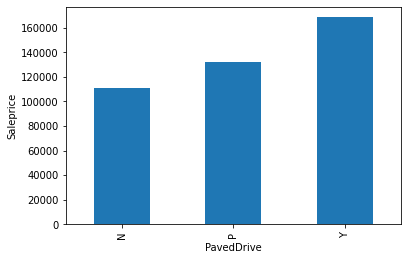

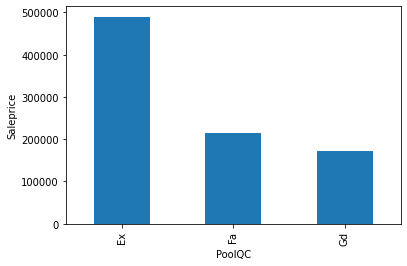

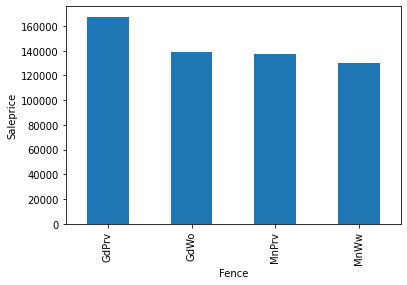

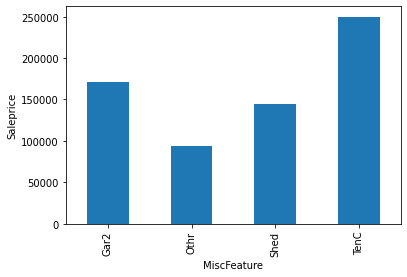

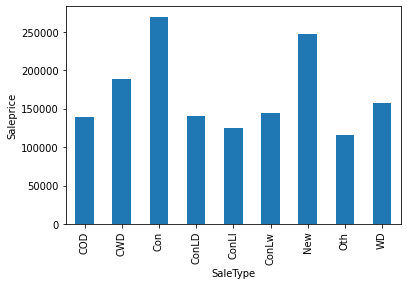

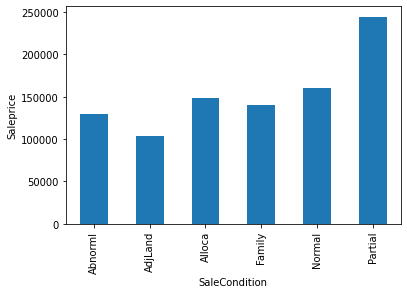

In [ ]:
for features in categorical_features:
  df1 = df.copy()
  df1.groupby(features)['SalePrice'].median().plot.bar()
  plt.xlabel(features)
  plt.ylabel('Saleprice')
  plt.show()

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
X = df.drop(['SalePrice'], axis= 1)
y = df.loc[:, 'SalePrice']
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [ ]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.1, random_state= 0)

In [ ]:
Nan_categor_features= [features for features in df.columns if df[features].isnull().sum()>1 and 
                       df[features].dtypes == 'O']
for features in Nan_categor_features:
  print('{}: {}% missing values'.format(features, np.round(df[features].isnull().mean(), 2)))

Alley: 0.94% missing values
MasVnrType: 0.01% missing values
BsmtQual: 0.03% missing values
BsmtCond: 0.03% missing values
BsmtExposure: 0.03% missing values
BsmtFinType1: 0.03% missing values
BsmtFinType2: 0.03% missing values
FireplaceQu: 0.47% missing values
GarageType: 0.06% missing values
GarageFinish: 0.06% missing values
GarageQual: 0.06% missing values
GarageCond: 0.06% missing values
PoolQC: 1.0% missing values
Fence: 0.81% missing values
MiscFeature: 0.96% missing values


In [ ]:
##
df[Nan_categor_features] = df[Nan_categor_features].fillna('Missing')
df[Nan_categor_features].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [ ]:
Nan_numer_features = [features for features in df.columns if df[features].isnull().sum()>1 and 
                      df[features].dtypes != 'O']
for features in Nan_numer_features:
  print('{} missing values {}%'.format(features, np.round(df[features].isnull().mean(), 2)))

LotFrontage missing values 0.18%
MasVnrArea missing values 0.01%
GarageYrBlt missing values 0.06%


In [ ]:
##
for features in Nan_numer_features:
  median_val = df[features].median()
  df[features+'nan'] = np.where(df[features].isnull(), 1, 0)
  df[features].fillna(median_val, inplace= True)
df[Nan_numer_features].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [ ]:
df.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Missing,Missing,Missing,0,4,2008,WD,Abnorml,129900,0,0,0
9,10,190,RL,50.0,7420,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Un

In [ ]:
##
for features in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
  df[features]= df['YrSold'] - df[features]
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,77,58,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,77.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Missing,Missing,Missing,0,4,2008,WD,Abnorml,129900,0,0,0
9,10,190,RL,50.0,7420,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,69,58,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,

In [ ]:
numer_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [ ]:
continuous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [ ]:
##
continuous_numer_features= ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
for features in continuous_numer_features:
  df[features] = np.log(df[features])

In [ ]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0
5,6,50,RL,4.442651,9.554993,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,566,0,7.216709,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,11.870600,0,0,0
6,7,20,RL,4.317488,9.218705,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,0,0,7.434848,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,12.634603,0,0,0
7,8,60,RL,4.234107,9.247829,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,983,0,7.644919,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,12.206073,1,0,0
8,9,50,RM,3.931826,8.719317,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,77,58,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,752,0,7.480992,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,77.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Missing,Missing,Missing,0,4,2008,WD,Abnorml,11.774520,0,0,0
9,10,190,RL,3.912023,8.911934,Pa

In [ ]:
df.shape

(1460, 84)

In [ ]:
##
for features in categorical_features:
  temp= df.groupby(features)['SalePrice'].count()/len(df)
  temp_df= temp[temp>0.1].index
  df[features]= np.where(df[features].isin(temp_df),df[features], 'Rare_val')

In [ ]:
df.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,Rare_val,Gtl,Rare_val,Rare_val,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Rare_val,ALQ,978,Unf,0,284,1262,GasA,...,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Rare_val,GLQ,486,Unf,0,434,920,GasA,...,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Rare_val,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Rare_val,None,0.0,TA,TA,Rare_val,TA,Rare_val,No,ALQ,216,Unf,0,540,756,GasA,...,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Rare_val,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,Rare_val,Gtl,Rare_val,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0
5,6,50,RL,4.442651,9.554993,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Rare_val,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Rare_val,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,566,0,7.216709,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Rare_val,700,10,2009,WD,Normal,11.870600,0,0,0
6,7,20,RL,4.317488,9.218705,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Rare_val,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Rare_val,186.0,Gd,TA,PConc,Rare_val,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,0,0,7.434848,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,12.634603,0,0,0
7,8,60,RL,4.234107,9.247829,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Rare_val,Rare_val,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Rare_val,240.0,TA,TA,CBlock,Gd,TA,Rare_val,ALQ,859,Rare_val,32,216,1107,GasA,...,983,0,7.644919,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Rare_val,350,11,2009,WD,Normal,12.206073,1,0,0
8,9,50,RM,3.931826,8.719317,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Rare_val,Rare_val,Norm,1Fam,1.5Fin,7,5,77,58,Gable,CompShg,Rare_val,Rare_val,None,0.0,TA,TA,Rare_val,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,752,0,7.480992,0,0,2,0,2,2,TA,8,Rare_val,2,TA,Detchd,77.0,Unf,2,468,Rare_val,TA,Y,90,0,205,

In [ ]:
##
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for features in categorical_features:
  df[features]= le.fit_transform(df[features])


In [ ]:
df.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,0,4.174387,9.041922,0,0,2,0,0,1,0,0,0,0,0,2,7,5,5,5,0,0,3,3,0,196.0,0,1,1,0,1,1,2,706,1,0,150,856,0,...,854,0,7.444249,1,0,2,1,3,1,0,8,1,0,1,0,5.0,1,2,548,1,1,1,0,61,0,0,0,0,0,0,0,0,2,2008,1,0,12.247694,0,0,0
1,2,20,0,4.382027,9.169518,0,0,2,0,0,2,0,2,1,0,0,1,6,8,31,31,0,0,1,1,1,0.0,2,1,0,0,1,2,0,978,1,0,284,1262,0,...,0,0,7.140453,0,1,2,0,3,1,2,6,1,1,3,0,31.0,1,2,460,1,1,1,298,0,0,0,0,0,0,0,0,0,5,2007,1,0,12.109011,0,0,0
2,3,60,0,4.219508,9.328123,0,0,0,0,0,1,0,0,0,0,0,2,7,5,7,6,0,0,3,3,0,162.0,0,1,1,0,1,2,2,486,1,0,434,920,0,...,866,0,7.487734,1,0,2,1,3,1,0,6,1,1,3,0,7.0,1,2,608,1,1,1,0,42,0,0,0,0,0,0,0,0,9,2008,1,0,12.317167,0,0,0
3,4,70,0,4.094345,9.164296,0,0,0,0,0,0,0,2,0,0,0,2,7,5,91,36,0,0,4,2,1,0.0,2,1,2,2,0,1,0,216,1,0,540,756,0,...,756,0,7.448334,1,0,1,0,3,1,0,7,1,1,0,1,8.0,3,3,642,1,1,1,0,35,272,0,0,0,0,0,0,0,2,2006,1,1,11.849398,0,0,0
4,5,60,0,4.430817,9.565214,0,0,0,0,0,2,0,2,0,0,0,2,8,5,8,8,0,0,3,3,0,350.0,0,1,1,0,1,0,2,655,1,0,490,1145,0,...,1053,0,7.695303,1,0,2,1,4,1,0,9,1,1,3,0,8.0,1,3,836,1,1,1,192,84,0,0,0,0,0,0,0,0,12,2008,1,0,12.429216,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,0,4.234107,9.186560,0,0,1,0,0,0,0,2,0,0,0,2,6,8,16,16,0,0,3,3,0,68.0,1,0,1,0,0,1,0,310,1,0,370,680,0,...,790,0,7.293018,0,0,2,1,3,1,2,6,1,1,3,2,16.0,0,2,420,1,1,1,232,63,0,0,0,0,0,0,1,480,4,2009,1,0,12.128111,1,0,0
96,97,20,0,4.356709,9.236398,0,0,0,0,0,1,0,0,0,0,0,1,7,5,7,7,0,0,3,3,0,183.0,0,1,1,0,1,0,0,1162,1,0,426,1588,0,...,0,0,7.370231,0,0,2,0,3,1,0,6,1,0,1,0,7.0,1,2,472,1,1,1,158,29,0,0,0,0,0,0,0,0,8,2006,1,0,12.273731,0,0,0
97,98,20,0,4.290459,9.298443,0,0,2,1,0,1,0,2,0,0,0,1,4,5,42,42,1,0,0,0,0,48.0,2,1,0,2,1,1,3,520,1,0,440,960,0,...,0,0,6.866933,1,0,1,0,3,1,2,6,1,0,1,0,42.0,0,1,432,1,1,0,120,0,0,0,0,0,0,0,0,0,5,2007,1,0,11.458997,0,0,0
98,99,30,0,4.442651,9.270965,0,0,2,0,0,0,0,2,0,0,0,1,5,5,90,60,0,0,4,4,1,0.0,2,1,2,2,1,1,0,108,1,0,350,458,0,...,0,0,6.727432,0,0,1,0,2,1,2,5,1,0,1,2,90.0,3,1,366,0,1,1,0,0,77,0,0,0,0,0,1,400,5,2010,0,1,11.326596,0,0,0


In [ ]:
feature_scaling= [features for features in df.columns if features not in ['Id', 'SalePrice']]
len(feature_scaling)

82

In [ ]:
##
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(df[feature_scaling])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
new_data= pd.concat([df[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scaling]), columns=feature_scaling)],
                    axis=1)

In [ ]:
new_data.head(10)

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.0,0.418208,0.366344,0.0,0.0,1.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.666667,0.666667,0.500,0.036765,0.098361,0.0,0.0,0.75,0.75,0.0,0.12250,0.0,1.0,0.5,0.0,1.0,0.5,0.5,0.125089,1.0,0.00000,0.064212,0.140098,...,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.0,0.500000,1.0,0.000000,0.333333,0.0,0.046729,0.333333,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.090909,0.50,1.0,0.0,0.0,0.0,0.0
1,2,12.109011,0.000000,0.0,0.495064,0.391317,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.333333,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.25,0.25,0.5,0.00000,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.173281,1.0,0.00000,0.121575,0.206547,...,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.0,0.333333,1.0,0.333333,1.000000,0.0,0.289720,0.333333,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.363636,0.25,1.0,0.0,0.0,0.0,0.0
2,3,12.317167,0.235294,0.0,0.434909,0.422359,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.666667,0.666667,0.500,0.051471,0.114754,0.0,0.0,0.75,0.75,0.0,0.10125,0.0,1.0,0.5,0.0,1.0,1.0,0.5,0.086109,1.0,0.00000,0.185788,0.150573,...,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.0,0.333333,1.0,0.333333,1.000000,0.0,0.065421,0.333333,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.727273,0.50,1.0,0.0,0.0,0.0,0.0
3,4,11.849398,0.294118,0.0,0.388581,0.390295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.666667,0.666667,0.500,0.669118,0.606557,0.0,0.0,1.00,0.50,0.5,0.00000,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.038271,1.0,0.00000,0.231164,0.123732,...,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.0,0.416667,1.0,0.333333,0.000000,0.5,0.074766,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.090909,0.00,1.0,1.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.0,0.513123,0.468761,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.666667,0.777778,0.500,0.058824,0.147541,0.0,0.0,0.75,0.75,0.0,0.21875,0.0,1.0,0.5,0.0,1.0,0.0,0.5,0.116052,1.0,0.00000,0.209760,0.187398,...,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.0,0.583333,1.0,0.333333,1.000000,0.0,0.074766,0.333333,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.50,1.0,0.0,0.0,0.0,0.0
5,6,11.870600,0.176471,0.0,0.517503,0.466761,0.0,0.0,0.0,0.0,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.000000,0.444444,0.500,0.117647,0.245902,0.0,0.0,0.75,0.75,0.5,0.00000,1.0,1.0,1.0,0.0,1.0,0.5,0.5,0.129695,1.0,0.00000,0.027397,0.130278,...,0.328654,0.274092,0.0,0.497220,0.333333,0.0,0.333333,0.5,0.125,0.333333,1.0,0.250000,1.0,0.000000,0.333333,0.0,0.149533,1.000000,0.50,0.338505,1.0,1.0,1.0,0.046674,0.054845,0.000000,0.629921,0.0,0.0,0.0,0.5,1.0,0.045161,0.818182,0.75,1.0,0.0,0.0,0.0,0.0
6,7,12.634603,0.000000,0.0,0.471175,0.400943,0.0,0.0,1.0,0.0,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.333333,0.777778,0.500,0.022059,0.049180,0.0,0.0,0.75,0.75,1.0,0.11625,0.0,1.0,0.5,0.5,1.0,0.0,0.5,0.242558,1.0,0.00000,0.135702,0

In [ ]:
df_test= pd.read_csv('test.csv')

In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
Nan_categor_features= [features for features in df_test.columns if df_test[features].isnull().sum()>1 and 
                       df_test[features].dtypes == 'O']
df_test[Nan_categor_features] = df[Nan_categor_features].fillna('Missing')
df_test[Nan_categor_features].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [ ]:
Nan_numer_features = [features for features in df_test.columns if df_test[features].isnull().sum()>1 and 
                      df_test[features].dtypes != 'O']
for features in Nan_numer_features:
  median_val = df_test[features].median()
  df_test[features+'nan'] = np.where(df_test[features].isnull(), 1, 0)
  df_test[features].fillna(median_val, inplace= True)
df_test[Nan_numer_features].isnull().sum()                      

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

In [ ]:
for features in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
  df_test[features]= df_test['YrSold'] - df_test[features]
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,0,80.0,11622,Pave,0,Reg,Lvl,0,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,0,0.0,TA,TA,CBlock,0,1,1,2,468.0,1,144.0,270.0,882.0,GasA,...,0,896,0.0,0.0,1,0,2,1,TA,5,1,0,1,0,49.0,1,1.0,730.0,1,1,Y,140,0,0,0,120,0,0,0,0,0,6,2010,WD,Normal,0,0,0,0,0
1,1462,20,0,81.0,14267,Pave,0,IR1,Lvl,0,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,1,108.0,TA,TA,CBlock,0,1,2,0,923.0,1,0.0,406.0,1329.0,GasA,...,0,1329,0.0,0.0,1,1,3,1,Gd,6,1,0,3,0,52.0,1,1.0,312.0,1,1,Y,393,36,0,0,0,0,0,0,0,12500,6,2010,WD,Normal,0,0,0,0,0
2,1463,60,0,74.0,13830,Pave,0,IR1,Lvl,0,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,0,0.0,TA,TA,PConc,0,1,2,2,791.0,1,0.0,137.0,928.0,GasA,...,0,1629,0.0,0.0,2,1,3,1,TA,6,1,1,3,0,13.0,1,2.0,482.0,1,1,Y,212,34,0,0,0,0,0,0,0,0,3,2010,WD,Normal,0,0,0,0,0
3,1464,60,0,78.0,9978,Pave,0,IR1,Lvl,0,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,1,20.0,TA,TA,PConc,2,0,1,0,602.0,1,0.0,324.0,926.0,GasA,...,0,1604,0.0,0.0,2,1,3,1,Gd,7,1,1,0,1,12.0,3,2.0,470.0,1,1,Y,360,36,0,0,0,0,0,0,0,0,6,2010,WD,Normal,0,0,0,0,0
4,1465,120,0,43.0,5005,Pave,0,IR1,HLS,0,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,0,0.0,Gd,TA,PConc,0,1,0,2,263.0,1,0.0,1017.0,1280.0,GasA,...,0,1280,0.0,0.0,2,0,2,1,Gd,5,1,0,3,0,18.0,1,2.0,506.0,1,1,Y,0,82,0,0,144,0,0,0,0,0,1,2010,WD,Normal,0,0,0,0,0
5,1466,60,0,75.0,10000,Pave,0,IR1,Lvl,0,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,17,16,Gable,CompShg,HdBoard,HdBoard,1,0.0,TA,TA,PConc,0,1,1,2,0.0,1,0.0,763.0,763.0,GasA,...,0,1655,0.0,0.0,2,1,3,1,TA,7,1,1,1,0,17.0,3,2.0,440.0,1,1,Y,157,84,0,0,0,0,0,1,1,0,4,2010,WD,Normal,0,0,0,0,0
6,1467,20,0,67.0,7980,Pave,0,IR1,Lvl,0,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,18,3,Gable,CompShg,HdBoard,HdBoard,2,0.0,TA,Gd,PConc,1,1,0,2,935.0,1,0.0,233.0,1168.0,GasA,...,0,1187,1.0,0.0,2,0,3,1,TA,6,1,0,0,0,18.0,1,2.0,420.0,1,1,Y,483,21,0,0,0,0,0,0,0,500,3,2010,WD,Normal,1,0,0,0,0
7,1468,60,0,63.0,8402,Pave,0,IR1,Lvl,0,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,12,12,Gable,CompShg,VinylSd,VinylSd,2,0.0,TA,TA,PConc,0,1,2,0,0.0,0,0.0,789.0,789.0,GasA,...,0,1465,0.0,0.0,2,1,3,1,TA,7,1,1,3,0,12.0,1,2.0,393.0,1,1,Y,0,75,0,0,0,0,0,0,1,0,5,2010,WD,Normal,0,0,0,0,0
8,1469,20,1,85.0,10176,Pave,0,Reg,Lvl,0,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,20,20,Gable,CompShg,HdBoard,HdBoard,1,0.0,TA,TA,PConc,2,1,1,4,637.0,1,0.0,663.0,1300.0,GasA,...,0,1341,1.0,0.0,1,1,2,1,Gd,5,0,1,3,1,20.0,3,2.0,506.0,0,1,Y,192,0,0,0,0,0,0,0,0,0,2,2010,WD,Normal,0,0,0,0,0
9,1470,20,0,70.0,8400,Pave,0,Reg,Lvl,0,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,40,40,Gable,CompShg,Plywood,Plywood,1,0.0,TA,TA,CBlock,2,1,1,2,804.0,1,78.0,0.0,882.0,GasA,...,0,882,1.0,0.0,1,0,2,1,TA,4,1,0,3,0,40.0,1,2.0,525.0,0,1,Y,240,0,0,0,0,0,0,0,0,0,4,2010,WD,Normal,0,0,0,0,0


In [ ]:
##t
continuous_numer_features= ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']
for features in continuous_numer_features:
  df_test[features] = np.log(df_test[features])

In [ ]:
categorical_features = [features for features in df_test.columns if df_test[features].dtypes == 'O']
print('No. of categorical features: ', len(categorical_features))

No. of categorical features:  25


In [ ]:
for features in categorical_features:
  temp= df_test.groupby(features).count()/len(df_test)
  temp_df= temp[temp>0.1].index
  df_test[features]= np.where(df_test[features].isin(temp_df),df_test[features], 'Rare_val')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for features in categorical_features:
  df_test[features]= le.fit_transform(df_test[features])


In [ ]:
feature_scaling= [features for features in df_test.columns if features not in ['Id']]
len(feature_scaling)

84

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler1= MinMaxScaler()
scaler1.fit(df_test[feature_scaling])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
df_test.shape, df.shape

((1459, 85), (1460, 84))

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,0,4.174387,9.041922,0,0,2,0,0,1,0,0,0,0,0,2,7,5,5,5,0,0,3,3,0,196.0,0,1,1,0,1,1,2,706,1,0,150,856,0,...,854,0,7.444249,1,0,2,1,3,1,0,8,1,0,1,0,5.0,1,2,548,1,1,1,0,61,0,0,0,0,0,0,0,0,2,2008,1,0,12.247694,0,0,0
1,2,20,0,4.382027,9.169518,0,0,2,0,0,2,0,2,1,0,0,1,6,8,31,31,0,0,1,1,1,0.0,2,1,0,0,1,2,0,978,1,0,284,1262,0,...,0,0,7.140453,0,1,2,0,3,1,2,6,1,1,3,0,31.0,1,2,460,1,1,1,298,0,0,0,0,0,0,0,0,0,5,2007,1,0,12.109011,0,0,0
2,3,60,0,4.219508,9.328123,0,0,0,0,0,1,0,0,0,0,0,2,7,5,7,6,0,0,3,3,0,162.0,0,1,1,0,1,2,2,486,1,0,434,920,0,...,866,0,7.487734,1,0,2,1,3,1,0,6,1,1,3,0,7.0,1,2,608,1,1,1,0,42,0,0,0,0,0,0,0,0,9,2008,1,0,12.317167,0,0,0
3,4,70,0,4.094345,9.164296,0,0,0,0,0,0,0,2,0,0,0,2,7,5,91,36,0,0,4,2,1,0.0,2,1,2,2,0,1,0,216,1,0,540,756,0,...,756,0,7.448334,1,0,1,0,3,1,0,7,1,1,0,1,8.0,3,3,642,1,1,1,0,35,272,0,0,0,0,0,0,0,2,2006,1,1,11.849398,0,0,0
4,5,60,0,4.430817,9.565214,0,0,0,0,0,2,0,2,0,0,0,2,8,5,8,8,0,0,3,3,0,350.0,0,1,1,0,1,0,2,655,1,0,490,1145,0,...,1053,0,7.695303,1,0,2,1,4,1,0,9,1,1,3,0,8.0,1,3,836,1,1,1,192,84,0,0,0,0,0,0,0,0,12,2008,1,0,12.429216,0,0,0


In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,0,4.382027,9.360655,1,0,3,3,0,4,0,12,1,2,0,2,5,6,49,49,1,0,11,13,0,0.0,3,4,1,0,1,1,2,468.0,1,144.0,270.0,882.0,0,...,0,6.797940,0.0,0.0,1,0,2,1,4,5,1,0,1,0,49.0,1,1.0,730.0,1,1,2,140,0,0,0,120,0,0,0,0,0,6,2010,9,4,0,0,0,0,0
1,1462,20,0,4.394449,9.565704,1,0,0,3,0,0,0,12,2,2,0,2,6,6,52,52,3,0,12,14,1,108.0,3,4,1,0,1,2,0,923.0,1,0.0,406.0,1329.0,0,...,0,7.192182,0.0,0.0,1,1,3,1,2,6,1,0,3,0,52.0,1,1.0,312.0,1,1,2,393,36,0,0,0,0,0,0,0,12500,6,2010,9,4,0,0,0,0,0
2,1463,60,0,4.304065,9.534595,1,0,0,3,0,4,0,8,2,2,0,4,5,5,13,12,1,0,11,13,0,0.0,3,4,2,0,1,2,2,791.0,1,0.0,137.0,928.0,0,...,0,7.395722,0.0,0.0,2,1,3,1,4,6,1,1,3,0,13.0,1,2.0,482.0,1,1,2,212,34,0,0,0,0,0,0,0,0,3,2010,9,4,0,0,0,0,0
3,1464,60,0,4.356709,9.208138,1,0,0,3,0,4,0,8,2,2,0,4,6,6,12,12,1,0,11,13,1,20.0,3,4,2,2,0,1,0,602.0,1,0.0,324.0,926.0,0,...,0,7.380256,0.0,0.0,2,1,3,1,2,7,1,1,0,1,12.0,3,2.0,470.0,1,1,2,360,36,0,0,0,0,0,0,0,0,6,2010,9,4,0,0,0,0,0
4,1465,120,0,3.761200,8.518193,1,0,0,1,0,4,0,22,2,2,4,2,8,5,18,18,1,0,6,6,0,0.0,2,4,2,0,1,0,2,263.0,1,0.0,1017.0,1280.0,0,...,0,7.154615,0.0,0.0,2,0,2,1,2,5,1,0,3,0,18.0,1,2.0,506.0,1,1,2,0,82,0,0,144,0,0,0,0,0,1,2010,9,4,0,0,0,0,0


In [ ]:
df_test.drop(['BsmtFullBathnan', 'BsmtHalfBathnan'], axis= 1, inplace= True)

In [ ]:
df_test.shape, df.shape

((1459, 83), (1460, 84))

In [ ]:
y_train= df[['SalePrice']]

In [ ]:
X_train= df.drop(['Id','SalePrice'], axis= 1)

In [ ]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,60,0,4.174387,9.041922,0,0,2,0,0,1,0,0,0,0,0,2,7,5,5,5,0,0,3,3,0,196.0,0,1,1,0,1,1,2,706,1,0,150,856,0,0,...,6.752270,854,0,7.444249,1,0,2,1,3,1,0,8,1,0,1,0,5.0,1,2,548,1,1,1,0,61,0,0,0,0,0,0,0,0,2,2008,1,0,0,0,0
1,20,0,4.382027,9.169518,0,0,2,0,0,2,0,2,1,0,0,1,6,8,31,31,0,0,1,1,1,0.0,2,1,0,0,1,2,0,978,1,0,284,1262,0,0,...,7.140453,0,0,7.140453,0,1,2,0,3,1,2,6,1,1,3,0,31.0,1,2,460,1,1,1,298,0,0,0,0,0,0,0,0,0,5,2007,1,0,0,0,0
2,60,0,4.219508,9.328123,0,0,0,0,0,1,0,0,0,0,0,2,7,5,7,6,0,0,3,3,0,162.0,0,1,1,0,1,2,2,486,1,0,434,920,0,0,...,6.824374,866,0,7.487734,1,0,2,1,3,1,0,6,1,1,3,0,7.0,1,2,608,1,1,1,0,42,0,0,0,0,0,0,0,0,9,2008,1,0,0,0,0
3,70,0,4.094345,9.164296,0,0,0,0,0,0,0,2,0,0,0,2,7,5,91,36,0,0,4,2,1,0.0,2,1,2,2,0,1,0,216,1,0,540,756,0,1,...,6.867974,756,0,7.448334,1,0,1,0,3,1,0,7,1,1,0,1,8.0,3,3,642,1,1,1,0,35,272,0,0,0,0,0,0,0,2,2006,1,1,0,0,0
4,60,0,4.430817,9.565214,0,0,0,0,0,2,0,2,0,0,0,2,8,5,8,8,0,0,3,3,0,350.0,0,1,1,0,1,0,2,655,1,0,490,1145,0,0,...,7.043160,1053,0,7.695303,1,0,2,1,4,1,0,9,1,1,3,0,8.0,1,3,836,1,1,1,192,84,0,0,0,0,0,0,0,0,12,2008,1,0,0,0,0


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) 
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
feature_sel_model.get_support()

array([ True,  True, False,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True,  True,
        True,  True, False, False, False, False, False,  True,  True,
       False, False, False, False, False,  True,  True, False,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [ ]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 82
selected features: 35


In [ ]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'Condition1',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea'],
      dtype='object')

In [ ]:
X_train = X_train[selected_feat]

In [ ]:
df_test= df_test[selected_feat]

In [ ]:
X_train.head()

,MSSubClass,MSZoning,LotArea,LotShape,Condition1,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,60,0,9.041922,2,0,7,5,5,5,196.0,0,2,706,0,150,856,0,6.752270,854,0,1,0,8,0,1,0,5.0,1,2,548,0,0,0,0,0
1,20,0,9.169518,2,1,6,8,31,31,0.0,2,0,978,0,284,1262,0,7.140453,0,0,0,2,6,1,3,0,31.0,1,2,460,298,0,0,0,0
2,60,0,9.328123,0,0,7,5,7,6,162.0,0,2,486,0,434,920,0,6.824374,866,0,1,0,6,1,3,0,7.0,1,2,608,0,0,0,0,0
3,70,0,9.164296,0,0,7,5,91,36,0.0,2,0,216,0,540,756,1,6.867974,756,0,1,0,7,1,0,1,8.0,3,3,642,0,272,0,0,0
4,60,0,9.565214,0,0,8,5,8,8,350.0,0,2,655,0,490,1145,0,7.043160,1053,0,1,0,9,1,3,0,8.0,1,3,836,192,0,0,0,0


In [ ]:
y_train.head()

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


In [ ]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

In [ ]:
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
from xgboost import XGBRegressor
regressor = XGBRegressor()

In [ ]:
from sklearn.model_selection import  RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   12.6s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  3.2min finished


[14:37:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['g

In [ ]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
regressor= XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [ ]:
regressor.fit(X_train, y_train)

[14:38:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = regressor.predict(df_test)

In [ ]:
y_pred.reshape(len(y_pred), 1)

In [ ]:
y_pred= np.exp(y_pred)

In [ ]:
pred = pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

In [ ]:
datasets.head()

,Id,SalePrice
0,1461,123241.476562
1,1462,154770.171875
2,1463,174168.187500
3,1464,178038.156250
4,1465,184993.968750
